In [1]:
#importing required libraries
import numpy as np
import pandas as pd

In [2]:
#Loading dataset
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#shape of a dataset
df.shape

(891, 12)

In [10]:
#describing
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
#full info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Handling missing values
#Age-->median
#Embarked-->mode
#Cabin-->drop the column as it has many missing values
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin',axis=1,inplace=True)

In [14]:
#Again checking 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
#Feature Enginering	
#If we clearly observe we have two columns 'SibSp','Parch' which indicates they are of same family or relatives or friends like that
#This is important because survival chance for person who is travelling alone and and person with a family

df['familySize']=df['SibSp']+df['Parch']+1
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,familySize
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,1


In [32]:
#Drop 'SibSp','Parch' columns
df=df.drop(['SibSp','Parch'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familySize
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,S,5
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,C,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,PP 9549,16.7000,S,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,113783,26.5500,S,1


In [38]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss')
df['Title'] = df['Title'].replace(['Mme'],'Mrs')
df['Title'] = df['Title'].replace(['Don','Rev','Dr','Major','Col','Sir','Lady','Countess','Jonkheer','Capt'],'Rare')
df['Title']

6          Mr
7      Master
9         Mrs
10       Miss
11       Miss
        ...  
886      Rare
887      Miss
888      Miss
889        Mr
890        Mr
Name: Title, Length: 884, dtype: object

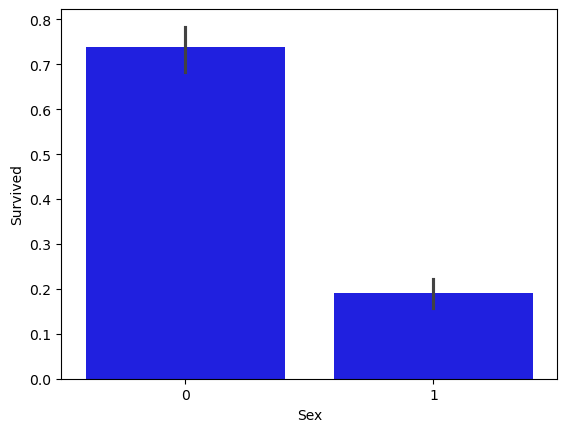

In [90]:
#Visualization
#Gender
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Sex',y='Survived',data=df,color='blue')
plt.show()

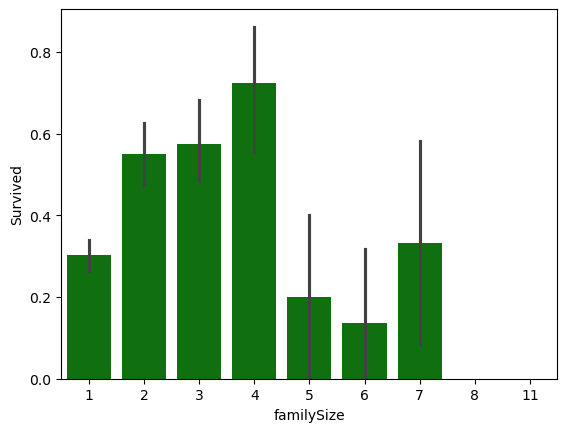

In [79]:
sns.barplot(x='familySize',y='Survived',data=df,color='green')
plt.show()

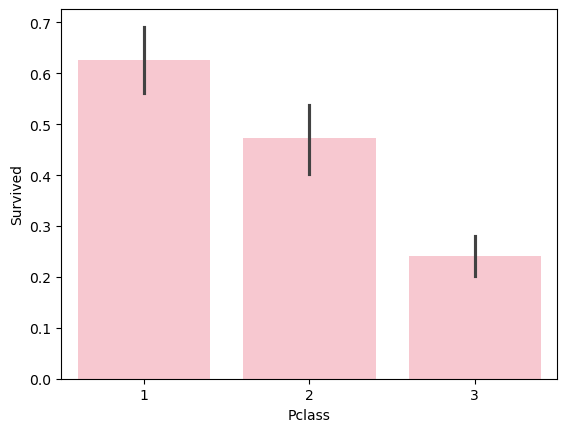

In [86]:
sns.barplot(x='Pclass',y='Survived',data=df,color='pink')
plt.show()

C:\Users\divya laxmi\AppData\Local\Temp\ipykernel_11208\2682050515.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived = df.groupby('AgeGroup')['Survived'].sum().reset_index()


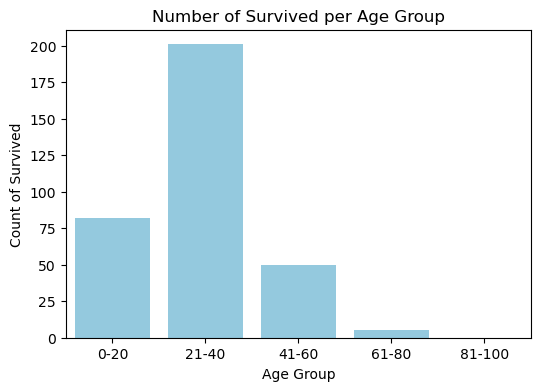

In [99]:
# Step 1: Create age groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Step 2: Aggregate survived counts per age group
age_survived = df.groupby('AgeGroup')['Survived'].sum().reset_index()

# Step 3: Plot barplot
plt.figure(figsize=(6,4))
sns.barplot(x='AgeGroup', y='Survived', data=age_survived, color='skyblue')
plt.title('Number of Survived per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Survived')
plt.show()

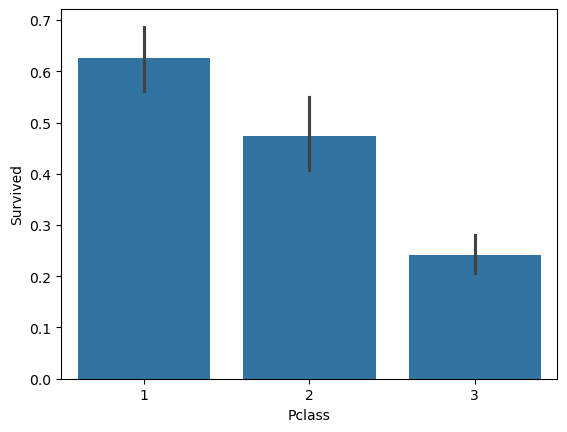

In [47]:
# Class
sns.barplot(x='Pclass',y='Survived',data=df)
plt.show()

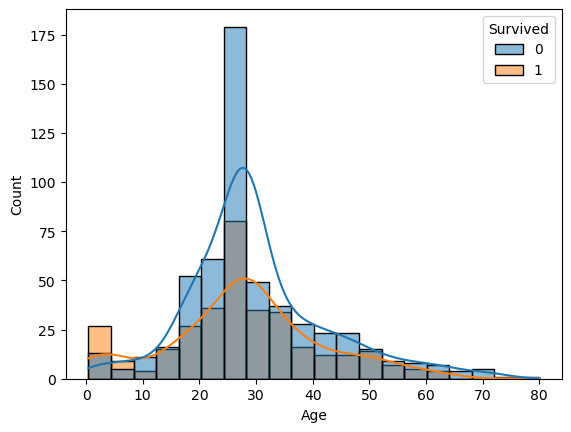

In [49]:
#Age distribution
sns.histplot(data=df, x="Age", hue="Survived", bins=20, kde=True)
plt.show()

In [51]:
#Dropping a unnecessary column
df=df.drop(['Name'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,familySize,Title
6,7,0,1,male,54.0,17463,51.8625,S,1,Mr
7,8,0,3,male,2.0,349909,21.0750,S,5,Master
9,10,1,2,female,14.0,237736,30.0708,C,2,Mrs
10,11,1,3,female,4.0,PP 9549,16.7000,S,3,Miss
11,12,1,1,female,58.0,113783,26.5500,S,1,Miss


In [68]:
from sklearn.preprocessing import LabelEncoder
#Encode Sex column
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df.Sex)
df.head()

df['Embarked']=encoder.fit_transform(df.Embarked)
df.head()

df['Title']=encoder.fit_transform(df.Title)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,familySize,Title
6,7,0,1,1,54.0,17463,51.8625,2,1,2
7,8,0,3,1,2.0,349909,21.0750,2,5,0
9,10,1,2,0,14.0,237736,30.0708,0,2,3
10,11,1,3,0,4.0,PP 9549,16.7000,2,3,1
11,12,1,1,0,58.0,113783,26.5500,2,1,1


In [71]:
df = df.drop(['Ticket'], axis=1)

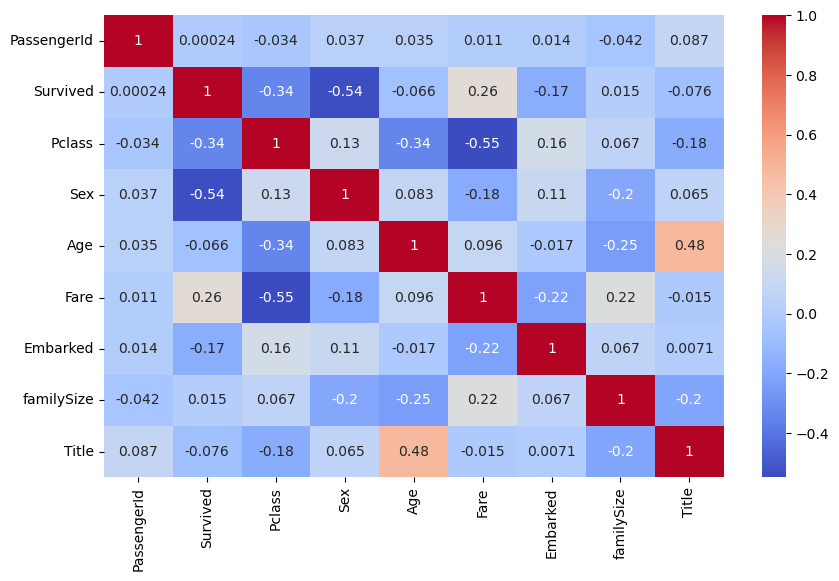

In [72]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [70]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
Ticket          object
Fare           float64
Embarked         int64
familySize       int64
Title            int32
dtype: object

In [74]:
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Test")
print("Chi2:", chi2, " P-value:", p)
#Age and survuved are dependent

Chi-square Test
Chi2: 254.40577294647207  P-value: 2.84429257872201e-57


In [75]:

contingency = pd.crosstab(df['familySize'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square Test")
print("Chi2:", chi2, " P-value:", p)
#dependent only

Chi-square Test
Chi2: 79.06569163503619  P-value: 7.53665398334874e-14


In [76]:
contingency = pd.crosstab(df['Embarked'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square Test")
print("Chi2:", chi2, " P-value:", p)
#dependent

Chi-square Test
Chi2: 25.7272132963568  P-value: 2.5906373066491278e-06


In [77]:
contingency = pd.crosstab(df['PassengerId'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square Test")
print("Chi2:", chi2, " P-value:", p)
#independent only

Chi-square Test
Chi2: 884.0000000000002  P-value: 0.4841859013773977
